# Preprocessing

In [1]:

from google.colab import files
import pandas as pd
import io

# Read file by upload
upload_files = files.upload()
for filename in upload_files.keys():
  df = pd.read_csv(io.StringIO(upload_files[filename].decode('latin-1')), header=None)

Saving crawling_tweet.csv to crawling_tweet.csv


In [2]:
# Checking
print(df.head().to_markdown())

|    | 0                         | 1       | 2                                                                                                                                                                                                                                                                                        |
|---:|:--------------------------|:--------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | 2019-12-22 21:15:51+00:00 | negatif | Ha ha ha ... Dulu waktu ngomongin ASN radikal dan celana cingkrang di puji2. Kok tiba2 berubah ...?                                                                                                                                                                                      |
|  1 | 2019-12-2

In [3]:
# Remove column
df = df.drop(df.columns[[0]], axis=1)

# Give column name
df.columns = ["Label", "Tweet"]

print(df.head().to_markdown())

|    | Label   | Tweet                                                                                                                                                                                                                                                                                    |
|---:|:--------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | negatif | Ha ha ha ... Dulu waktu ngomongin ASN radikal dan celana cingkrang di puji2. Kok tiba2 berubah ...?                                                                                                                                                                                      |
|  1 | positif | Aku wong bodo politik, tp menurutku lihat videonya "celana cingkrang,jenggot,ga mau

In [4]:
# Check colums Type
print('Column Value have df type \t:', df['Label'].dtypes)
print('Column Tweet have df type \t:', df['Tweet'].dtypes)

# Check null
print('Column Value have null value \t:', df['Label'].isnull().values.any())
print('Column Tweet have null value \t:', df['Tweet'].isnull().values.any())

# Check number of row
print('Column Value have row \t:', df['Label'].count())
print('Column Tweer have row \t:', df['Tweet'].count())

Column Value have df type 	: object
Column Tweet have df type 	: object
Column Value have null value 	: False
Column Tweet have null value 	: False
Column Value have row 	: 219
Column Tweer have row 	: 219


In [5]:
# Change label's column
df['Label'] = df['Label'].replace("negatif", 0)
df['Label'] = df['Label'].replace("positif", 1)

print(df.head().to_markdown())

|    |   Label | Tweet                                                                                                                                                                                                                                                                                    |
|---:|--------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |       0 | Ha ha ha ... Dulu waktu ngomongin ASN radikal dan celana cingkrang di puji2. Kok tiba2 berubah ...?                                                                                                                                                                                      |
|  1 |       1 | Aku wong bodo politik, tp menurutku lihat videonya "celana cingkrang,jenggot,ga mau

In [7]:
import re
import string

# Case Folding
# a. Make lower case
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())
# b. Delete link
for idx in df.index: 
  df['Tweet'][idx] = re.sub(r"http\S+", "", df['Tweet'][idx])
# c. Delete number
df['Tweet']= df['Tweet'].apply(lambda x:''.join([i for i in x if i not in string.digits]))
# d. Delete punctuation
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]',' ')

print(df.head().to_markdown())

|    |   Label | Tweet                                                                                                                                                                                                                                                                                  |
|---:|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |       0 | ha ha ha     dulu waktu ngomongin asn radikal dan celana cingkrang di puji  kok tiba berubah                                                                                                                                                                                           |
|  1 |       1 | aku wong bodo politik  tp menurutku lihat videonya  celana cingkrang jenggot ga mau salam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
!pip install Sastrawi 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

     |████████████████████████████████| 215kB 3.0MB/s 


In [9]:
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['di', 'kan', 'yg', 'dg', 'ha'] # To add more stopword
data = stop_factory + more_stopword
dictionary = ArrayDictionary(data)
stopwords = StopWordRemover(dictionary)

print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [11]:
# Filtering
for idx in df.index: 
  df['Tweet'][idx] = stopwords.remove(df['Tweet'][idx])
  
print(df['Tweet'].head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                 |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ha     dulu waktu ngomongin asn radikal celana cingkrang puji  kok tiba berubah                                                                                                                                                       |
|  1 | aku wong bodo politik  tp menurutku lihat videonya  celana cingkrang jenggot ga mau salaman    radikal   dlm islam jg diajarkan                                                                                                       |
|  2 | asn sukarela pakai celana cingkrang p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
# Stemming
for idx in df.index: 
  df['Tweet'][idx] = stemmer.stem(df['Tweet'][idx])
  
print(df['Tweet'].head().to_markdown())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


|    | Tweet                                                                                                                                                                                     |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ha dulu waktu ngomongin asn radikal celana cingkrang puji kok tiba ubah                                                                                                                   |
|  1 | aku wong bodo politik tp turut lihat video celana cingkrang jenggot ga mau salam radikal dlm islam jg ajar                                                                                |
|  2 | asn sukarela pakai celana cingkrang pak                                                                                                                                                   |
|  3 | islamofobia idap k

In [14]:
# Remove duplicate
df = df.drop_duplicates(subset='Tweet', keep='first')

print(df.head().to_markdown())

|    |   Label | Tweet                                                                                                                                                                                     |
|---:|--------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |       0 | ha dulu waktu ngomongin asn radikal celana cingkrang puji kok tiba ubah                                                                                                                   |
|  1 |       1 | aku wong bodo politik tp turut lihat video celana cingkrang jenggot ga mau salam radikal dlm islam jg ajar                                                                                |
|  2 |       1 | asn sukarela pakai celana cingkrang pak                                                                                                                            

In [15]:
# Check number of row
print('Column Value have row \t:', df['Label'].count())
print('Column Tweer have row \t:', df['Tweet'].count())

Column Value have row 	: 209
Column Tweer have row 	: 209


In [16]:
# Download
df.to_csv('clean_tweet.csv')
files.download('clean_tweet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Let's play a little

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Tokenize
tokens = df['Tweet'].apply(word_tokenize)

print(tokens.head().to_markdown())

|    | Tweet                                                                                                                                                                                                                                                             |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ['dulu', 'waktu', 'ngomongin', 'asn', 'radikal', 'celana', 'cingkrang', 'puji', 'kok', 'tiba', 'ubah']                                                                                                                                                            |
|  1 | ['aku', 'wong', 'bodo', 'politik', 'tp', 'turut', 'lihat', 'video', 'celana', 'cingkrang', 'jenggot', 'ga', 'mau', 'salam', 'radikal', 'dlm', 'islam', 'jg', 'ajar']                            

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

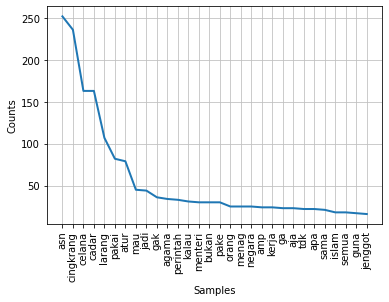

In [ ]:
# Display most frequent word

all_words = [val for sublist in tokens for val in sublist]
freq = FreqDist(all_words)
freq.plot(30,cumulative=False)
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
from wordcloud import WordCloud

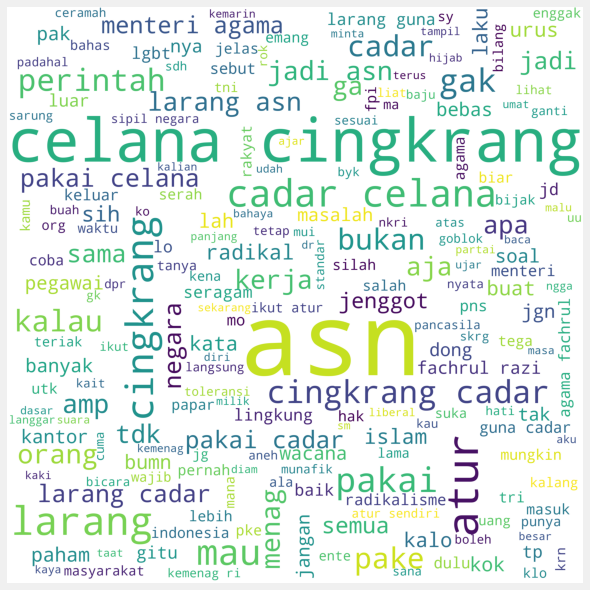

In [ ]:
# Display cloudword
comment_words = ' '
for words in all_words: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 2500, height = 2500, 
                background_color ='white',   
                min_font_size = 1).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 